In [24]:
pip install pydsm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# TODO LIST

* скачки происходят из-за того, то аргумент комплексного числа $\varphi \in (-\pi, \pi]$. Мы установили, что действительно значные функции (синусы) тоже имеют аргумент (фазу.)
* для задачи 1.4 ответить на вопросы
* для задачи 1.5 заполнить таблицу
* для всех задач написать теоретические выкладки

In [103]:
import pydsm
import numpy as np
import matplotlib.pyplot as plt
import math

# ATTENTION!

Из-за того, что в коде в разные моменты времени одни и те же переменные могут обозначать разные сущности, крайне рекомендуется исполнять код последоваетльно сверху вниз, в противном случае, вы можете получить удивительные результаты.

In [76]:
# зададим константы
N = 9
L = 2
nu_0 = -0.1

In [77]:
# зададим посследовательность отсчетов
k = np.array(range(N))

# функция 1[k]
def single_impulse(k):
  if k == 0: return 1
  else: return 0

# функция, возвращающая последовательность дискретных сигналов (принимает количество сигналов в последовательности)
def x_k(M):
  x_k = np.full((M), 0.0)
  for k in range(len(x_k)):
    for m in range(N):
      x_k[k] += single_impulse(k-m)
  return x_k

# Task 1.1

В данной работе мы будем пользоваться библиотечной функцией дискретного во времени преобразования Фурье (дальше ДВПФ) пакета pydsm. 

Для последовательности отсчетов $x[k]$ ДВПФ записывается следующим образом:
$$X(\nu) = \sum_{-∞}^{+∞} x[k] e^{-2j \pi \nu k}$$
где $\nu = \frac{f}{f_{\text{д}}}$ -- приведенная частота ($f_{\text{д}}$ --  частота дескритизации).

Рассматриваем последовательность отсчетов
$$x[k] = \sum_{m = 0}^{N-1} 1[k - m]$$
Данная последовательность представляет собой единичные сигналы в моменты времени $k$. Запишем ДВПФ для этой последовательности отсчетов:
$$X(\nu) = \sum_{-∞}^{+∞} x[k] e^{-2j \pi \nu k} = \sum_{-∞}^{+∞} \sum_{m = 0}^{N-1} 1[k - m] e^{-2j \pi \nu k}$$
Для функции $1[k]$ справедливо:
$$
1[k] = 
\begin{cases}
1, ~~~ k=0      \\
0, ~~~ k \neq 0 \\
\end{cases}
$$
Такоим образом,
$$X(\nu) = \sum_{k=0}^{N-1} \sum_{m = 0}^{N-1} 1[k - m] e^{-2j \pi \nu k} = e^{-2j \pi \nu \cdot 9} + e^{-2j \pi \nu \cdot 8} + \dots + e^{-2j \pi \nu} + 1$$
Воспользуемся формулой геометрической прогрессии и получим:
$$X(\nu) = \frac{1 - e^{-2j \pi \nu \cdot N}}{1 - e^{-2j \pi \nu}} = e^{-j \pi \nu (N-1)} \frac{\sin \pi \nu N}{\sin \pi \nu}$$

In [78]:
# ДВПФ для заданной последовательности (функция от nu)
X = pydsm.ft.dtft(x_k(N+10))

In [79]:
# диапазон приведенных частот
nu_range = np.linspace(-0.5, 0.5, 1000)

X_abs_range = np.array([abs(X(nu)) for nu in nu_range])
X_arg_range = np.angle([X(nu) for nu in nu_range])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


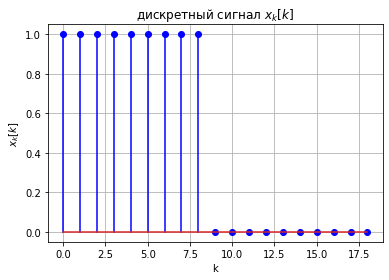

In [80]:
plt.stem(np.array(range(len(x_k(N+10)))), x_k(N+10), 'b', 'bo')
plt.title(r'дискретный сигнал $x_k[k]$')
plt.xlabel('k') 
plt.ylabel(r'$x_k[k]$') 
plt.grid()

Построим графики модуля и аргумента ДВПФ от заданного дискретного сигнала.

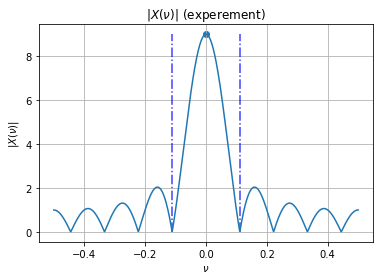

In [81]:
# проверяем результаты, полученные анаилтически на эксперементальном графике
# расположение крайних нулей и значение ДВПФ в 0
plt.vlines(1/9, 0, max(X_abs_range), ls='-.', color='blue', alpha=0.75)
plt.vlines(-1/9, 0, max(X_abs_range), ls='-.', color='blue', alpha=0.75)

plt.scatter(0, N)

plt.plot(nu_range, X_abs_range)
plt.title(r'$|X(\nu)|$ (experement)')
plt.ylabel(r'$|X(\nu)|$')
plt.xlabel(r'$\nu$')
plt.grid()

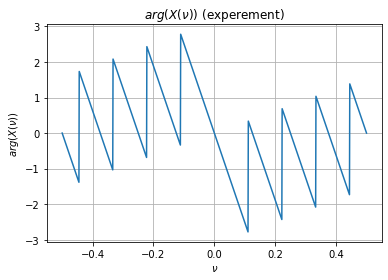

In [104]:
plt.plot(nu_range, X_arg_range)
plt.title(r'$arg(X(\nu))$ (experement)')
plt.ylabel(r'$arg(X(\nu))$')
plt.xlabel(r'$\nu$')
plt.grid()

Сравним полученные результаты с теоретическим расчетом.

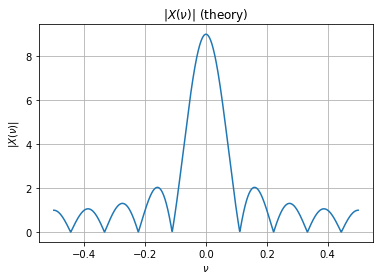

In [83]:
analytic_Xn = lambda nu : (1 - np.exp(- 2j * math.pi * nu * N)) / (1 - np.exp(- 2j * math.pi * nu))

plt.plot(nu_range, abs(analytic_Xn(nu_range)))
plt.title(r'$|X(\nu)|$ (theory)')
plt.ylabel(r'$|X(\nu)|$')
plt.xlabel(r'$\nu$')
plt.grid()

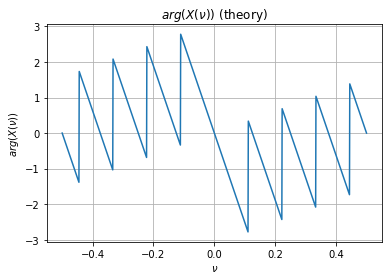

In [35]:
plt.plot(nu_range, np.angle(analytic_Xn(nu_range)))
plt.title(r'$arg(X(\nu))$ (theory)')
plt.ylabel(r'$arg(X(\nu))$')
plt.xlabel(r'$\nu$')
plt.grid()

Рассмотрим ДВПФ в форме
$$X (\nu) = e^{-j \pi \nu (N-1)} \frac{\sin \pi \nu N}{\sin \pi \nu}$$

тогда
$$|X (\nu)| = \frac{\sin \pi \nu N}{\sin \pi \nu}$$

Для того, чтобы найти значение ДВФП в точке $\nu = 0$ воспользуемся первым замечательным пределом:

$$|X (0)| = \frac{\sin \pi \nu N}{\sin \pi \nu} \frac{\pi N \nu}{\pi N \nu} = \frac{\sin \pi \nu N}{\pi N \nu} \frac{\pi \nu}{\sin \pi \nu} \cdot N = N$$

Модуль ДВФП равняется 0, при условии
$$\sin \pi \nu N = 0 ⇒ \pi \nu N = \pi k ~ (k \in Z) ~ ⇒ \nu_k = \frac{k}{N}$$
таким образом, ширина главного лепестка на нулевом уровне
$$\Delta \nu = \frac{2}{N}$$

Посчитаем
$$\int_{-\frac{1}{2}}^{\frac{1}{2}} |X(\nu)|^2 d \nu = \int_{-\frac{1}{2}}^{\frac{1}{2}} \frac{\sin^2 \pi \nu N}{\sin^2 \pi \nu} d \nu$$

воспользуемся формулой для косинуса двойного угла

$$\int_{-\frac{1}{2}}^{\frac{1}{2}} \frac{1 - \cos 2 \pi \nu N}{1 - \cos 2 \pi \nu} d \nu$$

сделаем замену $t = 2 \pi \nu ⇒ dt = 2 \pi d \nu$

$$\frac{1}{2 \pi} \int_{-\pi}^{\pi} \frac{1 - \cos t N}{1 - \cos t \nu} d t = \frac{1}{2 \pi} \cdot 18 \pi = 9 = N$$


* значение $|X(0)| = N = 9$
* ширина $\Delta \nu$ главного лепетка на нулевом уровне $\frac{2}{9}$
* точки скачков фазы на $\pi$
* энергия $x \Delta t = \int_{0.5}^{-0.5} |X(\nu)|^2 \ d \nu = N$

# Task 1.2

 Изучим свойство масштабируемости. Рассмотрим последовательность 
 $$x_L[k] = \sum_{m = 0}^{N-1} 1[k - Lm]$$
 между двумя последовательными единичными сигналами добавляем нулевой.

In [36]:
# по аналогии с 1.1 зададим последовательность сигналов x_L (функция принимает количество сигналов в последовательности)
def x_L(M):
  x_L = np.full((M), 0.0)
  for k in range(len(x_L)):
    for m in range(N):
      x_L[k] += x_k(M)[m] * single_impulse(k - m*L)
  return x_L

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


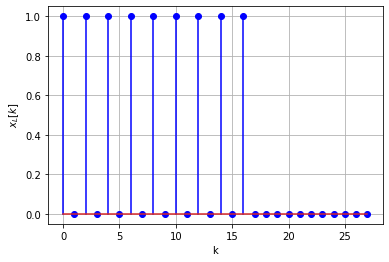

In [37]:
plt.stem(np.array(range(len(x_L(2*N+10)))), x_L(2*N+10), 'b', 'bo')
plt.xlabel('k') 
plt.ylabel(r'$x_L[k]$') 
plt.grid()

In [38]:
X = pydsm.ft.dtft(x_L(N+10))

nu_range = np.linspace(-0.5, 0.5, 1000)
X_abs_range = np.array([abs(X(nu)) for nu in nu_range])

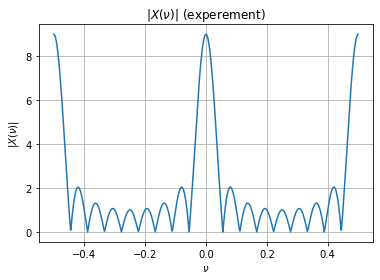

In [39]:

plt.plot(nu_range, X_abs_range)
plt.title(r'$|X(\nu)|$ (experement)')
plt.ylabel(r'$|X(\nu)|$')
plt.xlabel(r'$\nu$')
plt.grid()

Сравним полученные результаты с теоретическим расчетом.

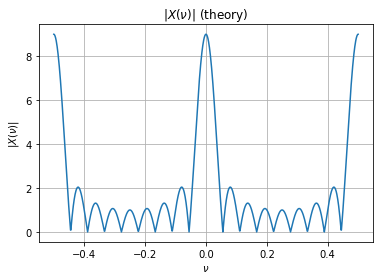

In [40]:
plt.plot(nu_range, abs(analytic_Xn(nu_range * L)))
plt.title(r'$|X(\nu)|$ (theory)')
plt.ylabel(r'$|X(\nu)|$')
plt.xlabel(r'$\nu$')
plt.grid()

# Task 1.3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


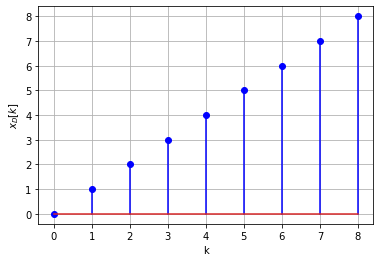

In [70]:
x_D = x_k(N) * k

plt.stem(k, x_D, 'b', 'bo')
plt.xlabel('k') 
plt.ylabel(r'$x_D[k]$') 
plt.grid()

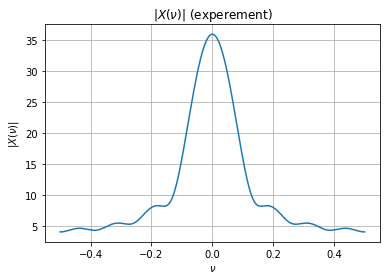

In [71]:
X = pydsm.ft.dtft(x_D)

nu_range = np.linspace(-0.5, 0.5, 1000)
X_abs_range = np.array([abs(X(nu)) for nu in nu_range])

plt.plot(nu_range, X_abs_range)
plt.title(r'$|X(\nu)|$ (experement)')
plt.ylabel(r'$|X(\nu)|$')
plt.xlabel(r'$\nu$')
plt.grid()

## Для выполнения задания **
# едиснтвенный вариант -- запрогать функцию самостоятельно,

Получим аналитическое выражение для этого спектра. Согласно теории
$$X_D(\nu) = \frac{j}{2 \pi} \frac{d X(\nu)}{d \nu}$$

будем использовать выражение для $X(\nu)$  форме
$$X (\nu) = e^{-j \pi \nu (N-1)} \frac{\sin \pi \nu N}{\sin \pi \nu}$$

$$\frac{j}{2 \pi} \frac{d X(\nu)}{d \nu} = \frac{j}{2} e^{-j(N-1)\pi \nu} \left(\frac{N \cos \pi \nu N \sin \pi \nu - \sin \pi \nu N \cos \pi \nu}{\sin^2 \pi \nu} - j (N-1) \frac{\sin \pi \nu N}{\sin \pi \nu} \right)$$

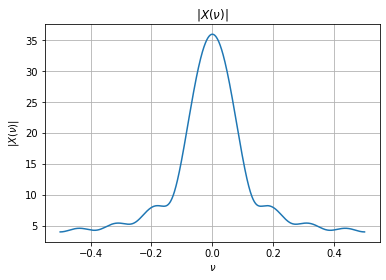

In [72]:
pi = math.pi
cos = np.cos
sin = np.sin
exp = np.exp

analytic_XD = lambda f : 0.5j * exp(-1j*(N - 1)*f) * ((N*cos(f*N)*sin(f) - sin(f*N)*cos(f))/(sin(f)**2) - 1j *(N-1)* (sin(f*N) / sin(f)))

XD_range = abs(analytic_XD(nu_range*pi))

plt.plot(nu_range, XD_range)
plt.title(r'$|X(\nu)|$')
plt.ylabel(r'$|X(\nu)|$')
plt.xlabel(r'$\nu$')
plt.grid()

# Task 1.4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


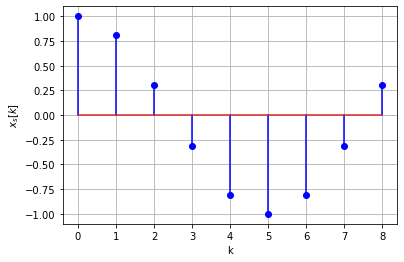

In [ ]:
x_s = x_k(N) * np.exp(2j * math.pi * nu_0 * k)

plt.stem(k, x_s, 'b', 'bo')
plt.xlabel('k') 
plt.ylabel(r'$x_s[k]$') 
plt.grid()

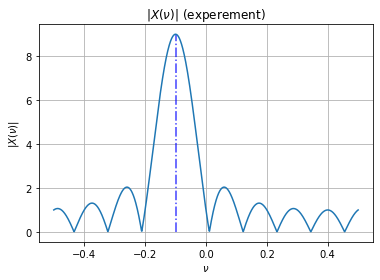

In [ ]:
X = pydsm.ft.dtft(x_s)
X_abs_range = np.array([abs(X(nu)) for nu in nu_range])

plt.plot(nu_range, X_abs_range)
plt.vlines(nu_0, 0, max(X_abs_range), ls='-.', color='blue', alpha=0.75)

plt.title(r'$|X(\nu)|$ (experement)')
plt.ylabel(r'$|X(\nu)|$')
plt.xlabel(r'$\nu$')
plt.grid()

Запишем аналитиеское выражение для ДВПФ сигнала $x_s[k]$

$$X_s(\nu) = \sum_{-∞}^{+∞} x_k[k] e^{2j \nu_0 \pi k} e^{-2j \nu \pi k} = \sum_{-∞}^{+∞} x_k[k] e^{-2j (\nu - \nu_0) \pi k} = X (\nu) = e^{-j \pi (\nu - \nu_0) (N-1)} \frac{\sin \pi (\nu - \nu_0) N}{\sin \pi (\nu - \nu_0)}$$

Умножение сигнала на комплексную экспоненту $e^{-2j \pi \nu_0 k}$ (с собственной частотой $\nu_0$) приводит к сдвигу спектральной функции по оси абцисс на величину $\nu_0$ (вправо, если $\nu_0$ > 0 и влево в противном случае). В справедливости этого свойства можно убедиться непосредственной подстановкой полученного дискретного сигнала в формулу ДВПФ.

Заметим, что таким образом мы получаем дискретный гармонический сигнал с собственной приведенной частотой $\nu_0$. Таким образом, по спектру мы можем определить дискретный гармонический сигнал и его собственную частоту.

# Task 1.5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


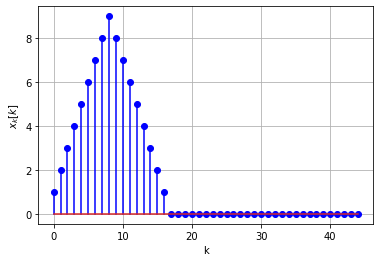

In [ ]:
# зададим функцию свертки двух произвольных дискретных сигналов sid1_k и sig2_k (M -- количество импульсов в результируещем ряде)
def convolution(sig1_k, sig2_k, M):
  x = np.full((M), 0.0)
  for k in range(len(x)):
    for m in range(N):
      x[k] += sig1_k(M)[m] * sig2_k(M)[k-m]
  return x

# print(convolution(x_k, x_k, 5*N))

plt.stem(np.array(range(len(convolution(x_k, x_k, 5*N)))), convolution(x_k, x_k, 5*N), 'b', 'bo')
plt.xlabel('k') 
plt.ylabel(r'$x_k[k]$') 
plt.grid()

Построим ДВПФ дискретного сигнала, используя библиотечную функцию

In [ ]:
X = pydsm.ft.dtft(convolution(x_k, x_k, 5*N))

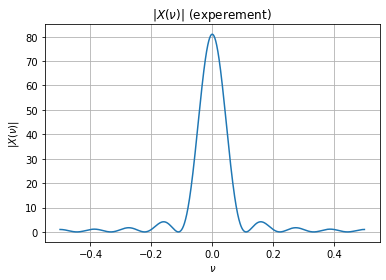

In [ ]:
X_abs_range = np.array([abs(X(nu)) for nu in nu_range])

plt.plot(nu_range, X_abs_range)
plt.title(r'$|X(\nu)|$ (experement)')
plt.ylabel(r'$|X(\nu)|$')
plt.xlabel(r'$\nu$')
plt.grid()

Построим ДВПФ дискретного сигнала, перемножив функции спектров для двух одиноковых сигналов.

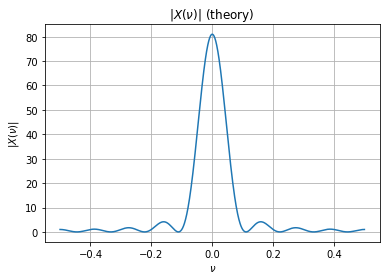

In [ ]:
X = pydsm.ft.dtft(x_k(N)) # ДВПФ для одного дискретного сигнала 
analytic_convolution = lambda nu : X(nu)**2

X_abs_range = np.array([abs(analytic_convolution(nu)) for nu in nu_range])

plt.plot(nu_range, X_abs_range)
plt.title(r'$|X(\nu)|$ (theory)')
plt.ylabel(r'$|X(\nu)|$')
plt.xlabel(r'$\nu$')
plt.grid()

Построим ДВПФ дискретного сигнала, используя функцию, полученную аналитически:

$$\overline{X}(\nu) = X(\nu) \cdot X(\nu) = \frac{\sin^2 N \pi \nu}{\sin^2 \pi \nu} e^{-2j (N-1) \pi \nu}$$

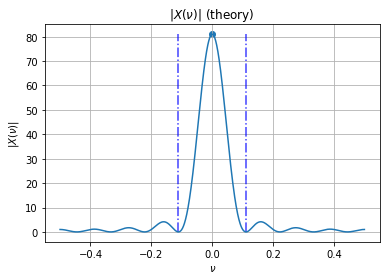

In [53]:
analytic_convolution = lambda nu : (np.sin(N*math.pi*nu)**2) / (np.sin(math.pi*nu)**2) * np.exp(-2j*(N - 1)*math.pi*nu)

X_abs_range = np.array([abs(analytic_convolution(nu)) for nu in nu_range])

plt.vlines(1/9, 0, max(X_abs_range), ls='-.', color='blue', alpha=0.75)
plt.vlines(-1/9, 0, max(X_abs_range), ls='-.', color='blue', alpha=0.75)

plt.scatter(0, N**2)

plt.plot(nu_range, X_abs_range)
plt.title(r'$|X(\nu)|$ (theory)')
plt.ylabel(r'$|X(\nu)|$')
plt.xlabel(r'$\nu$')
plt.grid()

Определим значение ДВПФ в точке 0, для этого воспользуемся первым замеательным пределом

$$|\overline{X}(0)| = \frac{\sin^2 N \pi \nu}{\sin^2 \pi \nu} = \frac{\sin^2 N \pi \nu}{\sin^2 \pi \nu} \frac{(\pi N \nu)^2}{(\pi N \nu)^2} = \frac{\sin^2 N \pi \nu}{(\pi N \nu)^2} \frac{(\pi \nu)^2}{\sin^2 \pi \nu} \cdot N^2 = N^2$$

Ширина главного лепестка вычисляется аналогично пункту 1.1. 
$$\Delta \nu = \frac{2}{N}$$

Вычислим энергию $x \Delta t$

$$\int_{-\frac{1}{2}}^{\frac{1}{2}} |\overline{X}(\nu)|^2 d \nu$$

воспользуемся формулой для косинуса двойного угла

$$\int_{-\frac{1}{2}}^{\frac{1}{2}} |\overline{X}(\nu)|^2 d \nu = \int_{-\frac{1}{2}}^{\frac{1}{2}} \frac{(1 - \cos 2 \pi \nu N)^2}{(1 - \cos 2 \pi \nu)^2} d \nu$$
